In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from stable_baselines3 import PPO, A2C

In [2]:
import sys
sys.path.append(r"C:\Users\fidel\OneDrive\Documentos\Mestrado\code")
from RL_trading_envs import StockEnvTrainOnePerTime, get_actions


In [3]:
df = pd.read_pickle(r"D:\Datasets\TwoSigmaDataSetBr_2022_03_04\Papertrade_br\models\MlpVarianceSwap\trained_model\model_MlpVarianceSwap_2022-03-03\df_test_mestrado.pkl")

In [4]:
df = df[['asset_identifier', 'date', 'yhat', 'target']].rename(columns = {'target': 'target_return'})

In [5]:
df.date.min()

Timestamp('2008-01-02 00:00:00')

In [13]:
df.sort_values(['date', 'asset_identifier'], inplace = True) #This is a important sort for the RL env
df.eval("yhat = 100 * yhat", inplace = True)
list_features = ['yhat']
df_valid = df.query("date < '2015-01-01'").reset_index(drop = True)
df_test  = df.query("date > '2015-01-01'").reset_index(drop = True)

In [14]:
df_valid.shape

(170210, 4)

In [15]:
np.random.seed(0)
df_sample = df_valid.copy()#sample(int(1e5))

In [16]:
df_sample[['yhat', 'target_return']].corr()

,yhat,target_return
yhat,1.000000,0.033203
target_return,0.033203,1.000000


In [17]:
# agent_parameters = dict(learning_rate=0.0003,
#                         n_steps=2048,
#                         batch_size=64,
#                         n_epochs=10)
# agent_parameters = dict(learning_rate=0.0003,
#                         n_steps=2048,
#                         batch_size=2048,
#                         n_epochs=1)
agent_parameters = {}
def fit_rl(df_valid, list_features, agent_parameters):
    list_features = ['yhat']
    env   = StockEnvTrainOnePerTime(df_valid, list_features)
    model = PPO('MlpPolicy', env, verbose=0, **agent_parameters)
    list_results = []
    for i in range(10):
        print(i)
    #     clear_output(wait=True)
        model.learn(total_timesteps=1e6)
    #     yhat = get_actions(df_valid, list_features, model).reshape(-1)
    #     list_results.append(pnl_metric(y, yhat))
    #     plt.plot(list_results)
    #     plt.show()
    return model


In [18]:
%%time
model = fit_rl(df_sample, list_features, agent_parameters)

0
1
2
3
4
5
6
7
8
9
Wall time: 2h 44min 57s


In [19]:
%%time
yhat = get_actions(df_sample, list_features, model).reshape(-1)

Wall time: 49.7 s


(array([31899.,  4336.,  2603.,  2306.,  2717.,  3736.,  5750.,  9495.,
        21006., 86362.]),
 array([-1.        , -0.80848974, -0.6169795 , -0.42546922, -0.23395896,
        -0.0424487 ,  0.14906156,  0.34057182,  0.5320821 ,  0.72359234,
         0.9151026 ], dtype=float32),
 <BarContainer object of 10 artists>)

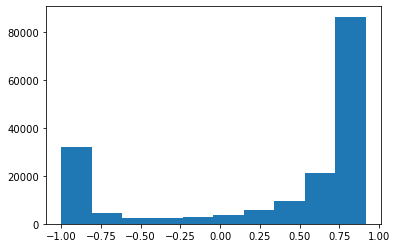

In [24]:
plt.hist(yhat)

In [21]:
np.corrcoef(df_sample['target_return'].values, yhat)

array([[1.        , 0.01700349],
       [0.01700349, 1.        ]])

In [22]:
np.corrcoef(df_sample['yhat'].values, yhat)

array([[1.        , 0.75604219],
       [0.75604219, 1.        ]])